In [1]:
#importer les librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Partie1: préparation des données

In [2]:
dataset_train= pd.read_csv('Google_Stock_Price_Train.csv')
dataset_train.head()


,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
df=dataset_train[['Open']].values  #transformer en array .values()

In [4]:
#feature squaling 
#normalisation des valeurs d'entrées car le RNN utilise la fonction sigmoid 
from sklearn.preprocessing import MinMaxScaler
nor=MinMaxScaler()

In [5]:
df_nor=nor.fit_transform(df)

In [6]:
df_nor.shape

(1258, 1)

In [7]:
#timesteps=60 jours (20jours/30 ouverts --> 3 mois) et une journée de sortie
X_train=[]
y_train=[]
for i in range(60,1258):
    X_train.append(df_nor[(i-60):i,0])
    y_train.append(df_nor[i,0])
X_train=np.array(X_train)#keras accepte uniquement les arrays
y_train=np.array(y_train)

In [8]:
#reshaping rajouter des dimensions TUPLE(,,) 3 valeurs ==>si on veut rajouter d'autres indicateurs 
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))#1 variable d'entrée (Open)

In [9]:
X_train.shape

(1198, 60, 1)

In [10]:
#Partie 2 construire notre RNN de trading
#importer les librairies
from keras.models import Sequential #construire de manière séquentielle un réseau de neurones
from keras.layers import Dense #ajouter des couches cachées
from keras.layers import LSTM
from keras.layers import Dropout #eviter problème de sur-entrainement

Using TensorFlow backend.


In [11]:
#initalisation
regressor=Sequential()

#couche LSTM + couche Dropout
regressor.add(LSTM(units=50, return_sequences=True,input_shape=(X_train.shape[1],1)))#return_sequences=ajouter des couches LSTM
                                                                 #input_shape= taille de x_train.shape (tuple (1198, 60, 1))
regressor.add(Dropout(0.2))

#ajouter de la 2ème couche LSTM + Dropout
regressor.add(LSTM(units=50, return_sequences=True))
                                                                 
regressor.add(Dropout(0.2))

#ajouter de la 3ème couche LSTM + Dropout
regressor.add(LSTM(units=50, return_sequences=True))
                                                                 
regressor.add(Dropout(0.2))

#ajouter de la 4ème couche LSTM + Dropout
regressor.add(LSTM(units=50))
                                                                 
regressor.add(Dropout(0.2))

In [12]:
#couche de sortie
regressor.add(Dense(units=1))

In [14]:
#complier LSTM gradient+ fonction de cout
regressor.compile(optimizer='adam',loss='mean_squared_error')


In [15]:
#entrainer notre modèle
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0401
Epoch 2/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0072 - ETA: 2s
Epoch 3/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0060
Epoch 4/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0052
Epoch 5/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0048
Epoch 6/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0051
Epoch 7/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0042
Epoch 8/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0045
Epoch 9/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0048
Epoch 10/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0044
Epoch 11/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0041
Epoch 12/100
1198/1198 [==============================] - 7s 6

1198/1198 [==============================] - 6s 5ms/step - loss: 0.0014
Epoch 98/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0013
Epoch 99/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0014
Epoch 100/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0016


In [16]:
#prédiction et visualisatio
dataset_test= pd.read_csv('Google_Stock_Price_Test.csv')#prix réel de l'action de google pour un mois de janvier 2017
dataset_test.head()


,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [20]:
df_test=dataset_test[['Open']].values  



In [21]:

#prédiction du jour j+1 à partir des 60 jours précédents de janvier 2017
#concaténer les datasets_train et _set
dataset_total=pd.concat((dataset_train[['Open']],dataset_test[['Open']]),axis=0)#0ième dimension=lignes


In [24]:
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs=inputs.reshape(-1,1)
#changer l'echelle sur les entrees
inputs=nor.transform(inputs)

inputs.shape

(80, 1)

In [25]:
inputs

array([[0.3691268 ],
       [0.37620682],
       [0.35528856],
       [0.451298  ],
       [0.4201888 ],
       [0.39294143],
       [0.39755417],
       [0.37770865],
       [0.46406351],
       [0.57552027],
       [0.62980047],
       [0.54076378],
       [0.64696417],
       [0.7733319 ],
       [0.6624115 ],
       [0.60512766],
       [0.6839734 ],
       [0.54580562],
       [0.41085604],
       [0.36054495],
       [0.24308088],
       [0.06511478],
       [0.32085389],
       [0.41632697],
       [0.37921047],
       [0.49967818],
       [0.12819138],
       [0.1181077 ],
       [0.025531  ],
       [0.11381678],
       [0.23954087],
       [0.28727741],
       [0.19330616],
       [0.30079382],
       [0.24822999],
       [0.21100622],
       [0.16530787],
       [0.28899378],
       [0.2733319 ],
       [0.13784596],
       [0.        ],
       [0.14074233],
       [0.21604806],
       [0.17603519],
       [0.29918472],
       [0.37985411],
       [0.43391976],
       [0.528

In [26]:
#timesteps=60 jours (20jours/30 ouverts --> 3 mois) et une journée de sortie
X_test=[]
for i in range(60,80): #20 valeurs à prédire pour le mois de janvier
    X_test.append(inputs[(i-60):i,0])
X_test=np.array(X_test)#keras accepte uniquement les arrays


In [27]:
#ajouter la 3 ème dimension pour que keras l'accepte
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [28]:
#prédiction
predicted_stock_price=regressor.predict(X_test)

In [30]:
predicted_stock_price=nor.inverse_transform(predicted_stock_price)

In [31]:
predicted_stock_price

array([[786.3008 ],
       [783.95483],
       [782.86676],
       [783.1382 ],
       [785.487  ],
       [790.81744],
       [797.3649 ],
       [801.9848 ],
       [804.2668 ],
       [804.88806],
       [804.56274],
       [803.70825],
       [802.71423],
       [802.25836],
       [802.453  ],
       [805.7704 ],
       [812.28625],
       [820.5217 ],
       [826.0859 ],
       [823.994  ]], dtype=float32)

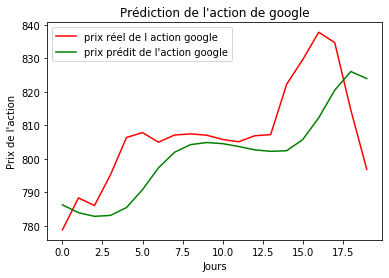

In [32]:
#visualisation des prédictions
plt.plot(df_test,color='red',label="prix réel de l action google")

plt.plot(predicted_stock_price,color='green',label="prix prédit de l'action google")
plt.title("Prédiction de l'action de google" )

plt.xlabel('Jours')
plt.ylabel("Prix de l'action")
plt.legend()
plt.show()


In [46]:
#évaluation de nos prédictions
#Pour voir prédictions suivent la même tendance que l'action réelle. 
#utiliser l'erreur relative au lieu de l'erreur absolue cad deviser par l'étendue de l'action autour de 800
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(df_test, predicted_stock_price))/800
rmse


0.0172049544802916